# Air Quality Dashboard Walkthrough #1 

This series of walkthroughs will cover the basics of how the Open Air Chicago Dashboard works with the following topics being covered: Data, Working with the Variable Pages, Front-end, and Back-end. This walkthrough will focus on the data and will explain what information each file in the Data folder contains as well as how to add/remove/change data from relevant files.

# Requirements
This walkthrough assumes that you are working with the dashboard and all required files organized as it is presented on the Github Repository ('App.R', 'DashFunctions.R', and 'Data' folder containing the following: 'CDPH_Permits' 'Chicago' 'county_averages_monthly.csv' 'county_averages_quarterly.csv' 'Description.csv' 'EPA_Points' 'CDPH_Permits' 'LargeAreaCounties' 'Master_Raster.tif' 'Master_Raster_Names.csv' 'Master_Raster.tif.aux.xml')

Due to incompatibility between Jupyter Notebook and R Shiny, this will focus more on the data and the processes behind the dashboard than the R Shiny Application itself.

# The Data

## Raster Data

The 1km resolution gridded data that forms the backbone of the dashboard is provided in the 'Master_Raster.tif' file. The names for each raster layer are in the corresponding 'Master_Raster_Names.csv' file. The km gridded data was stored in a raster stack because it allowed for greater reusability of code than individual rasters. While using vectorized  data in the dashboard was also explored, the file size and processing power required would have proven prohibitively large. 

### Examining the 1km Gridded Raster

Here we will briefly explore the raster stack and look at the naming style and the data itself. First, we must load in some packages along with the raster stack and the csv with the names. While the dashboard itself primarily uses the raster package for raster manipulation, The data processing involved other packages such as 'velox' for high-speed raster operations.

In [5]:
library(raster)

In [14]:
master.raster <- stack("Data/Master_Raster.tif")
master.raster.names <- read.csv("Data/Master_Raster_Names.csv")

names(master.raster) <- master.raster.names$x

#### Visualizing

Now that the data is loaded, let's visualize a couple of examples of the rasters to see what we are working with. 

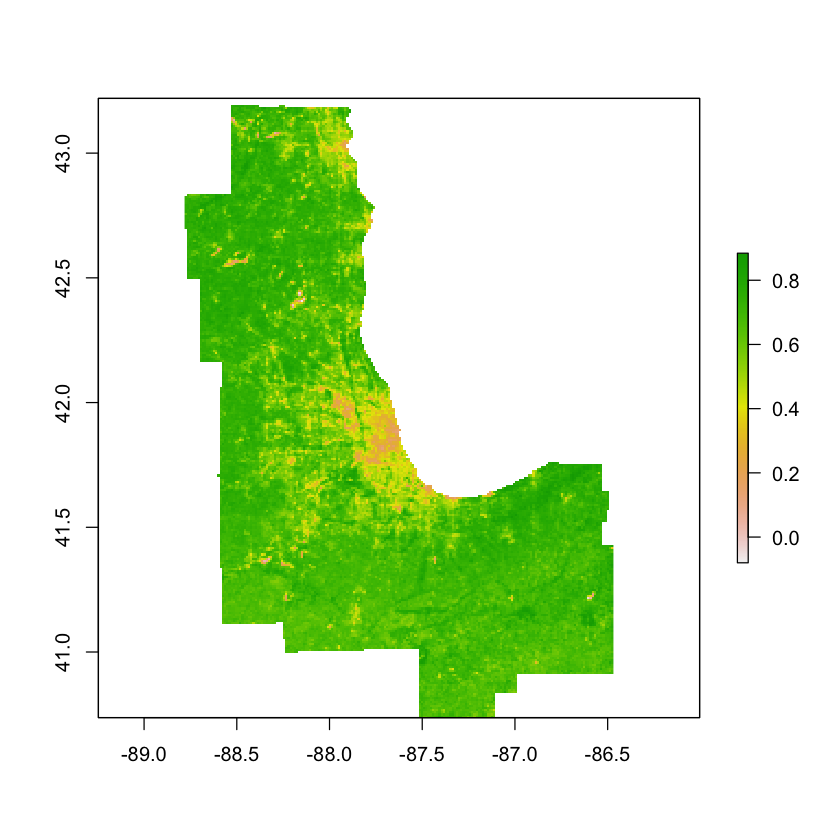

In [17]:
plot(master.raster$NDVI_3_15) #NDVI From the 3rd Quarter of 2015

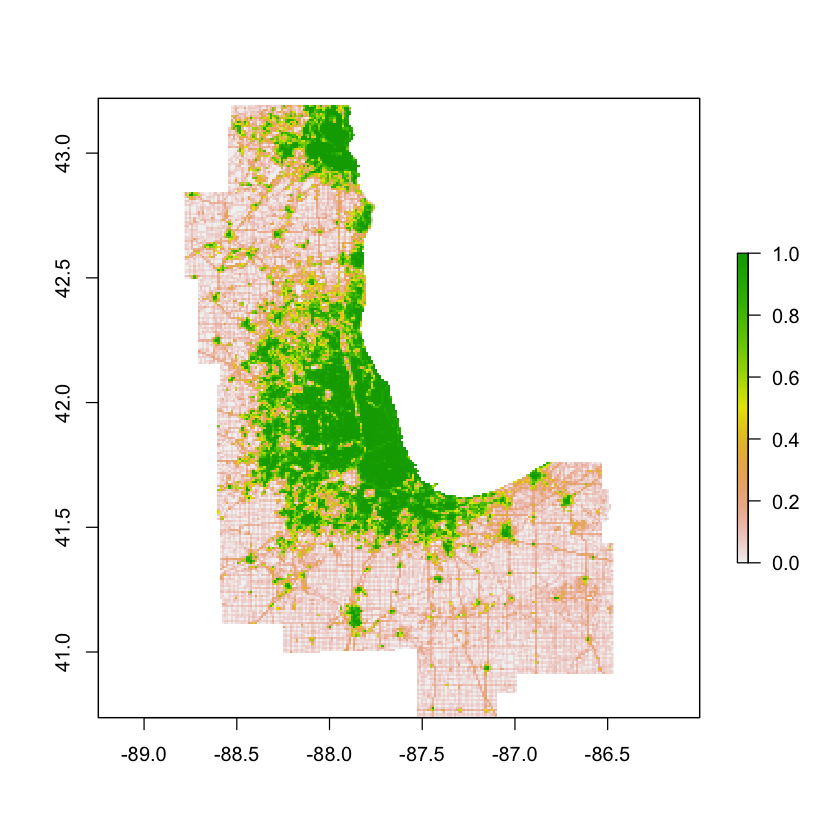

In [19]:
plot(master.raster$gry_ndx) #Gray Index

These visualizations are relatively straightforward and reflect what will be seen on the individual dashboard pages for each variable. A more in-depth look at the data processing behind the individual variables can be found in other walkthroughs. 

### Naming Conventions
The names of the different raster layers are generally self-explanatory, and new variable names are quite flexible. As a brief look at the names will show, there is a standard format for quarters and years that is required in order for quarterly aggregated data to properly display on the dashboard pages with time sliders.

In [15]:
names(master.raster)

[1] "Cell_ID"       "AOD_1_14"      "AOD_2_14"      "AOD_3_14"     
  [5] "AOD_4_14"      "AOD_1_15"      "AOD_2_15"      "AOD_3_15"     
  [9] "AOD_4_15"      "AOD_1_16"      "AOD_2_16"      "AOD_3_16"     
 [13] "AOD_4_16"      "AOD_1_17"      "AOD_2_17"      "AOD_3_17"     
 [17] "AOD_4_17"      "AOD_1_18"      "AOD_2_18"      "AOD_3_18"     
 [21] "AOD_4_18"      "NDVI_1_14"     "NDVI_2_14"     "NDVI_3_14"    
 [25] "NDVI_4_14"     "NDVI_1_15"     "NDVI_2_15"     "NDVI_3_15"    
 [29] "NDVI_4_15"     "NDVI_1_16"     "NDVI_2_16"     "NDVI_3_16"    
 [33] "NDVI_4_16"     "NDVI_1_17"     "NDVI_2_17"     "NDVI_3_17"    
 [37] "NDVI_4_17"     "NDVI_1_18"     "NDVI_2_18"     "NDVI_3_18"    
 [41] "NDVI_4_18"     "BRDF_1_14"     "BRDF_2_14"     "BRDF_3_14"    
 [45] "BRDF_4_14"     "BRDF_1_15"     "BRDF_2_15"     "BRDF_3_15"    
 [49] "BRDF_4_15"     "BRDF_1_16"     "BRDF_2_16"     "BRDF_3_16"    
 [53] "BRDF_4_16"     "BRDF_1_17"     "BRDF_2_17"     "BRDF_3_17"    
 [57] "BRDF_4_17"     "BRDF_1_18"     "BRDF_2_18"     "BRDF_3_18"    
 [61] "BRDF_4_18"     "RdDnsty"       "PECount"       "Elev"         
 [65] "NO2_1_14"      "NO2_2_14"      "NO2_3_14"      "NO2_4_14"     
 [69] "NO2_1_15"      "NO2_2_15"      "NO2_3_15"      "NO2_4_15"     
 [73] "NO2_1_16"      "NO2_2_16"      "NO2_3_16"      "NO2_4_16"     
 [77] "NO2_1_17"      "NO2_2_17"      "NO2_3_17"      "NO2_4_17"     
 [81] "NO2_1_18"      "NO2_2_18"      "NO2_3_18"      "NO2_4_18"     
 [85] "SO2_1_14"      "SO2_2_14"      "SO2_3_14"      "SO2_4_14"     
 [89] "SO2_1_15"      "SO2_2_15"      "SO2_3_15"      "SO2_4_15"     
 [93] "SO2_1_16"      "SO2_2_16"      "SO2_3_16"      "SO2_4_16"     
 [97] "SO2_1_17"      "SO2_2_17"      "SO2_3_17"      "SO2_4_17"     
[101] "SO2_1_18"      "SO2_2_18"      "SO2_3_18"      "SO2_4_18"     
[105] "CO_1_14"       "CO_2_14"       "CO_3_14"       "CO_4_14"      
[109] "CO_1_15"       "CO_2_15"       "CO_3_15"       "CO_4_15"      
[113] "CO_1_16"       "CO_2_16"       "CO_3_16"       "CO_4_16"      
[117] "CO_1_17"       "CO_2_17"       "CO_3_17"       "CO_4_17"      
[121] "CO_1_18"       "CO_2_18"       "CO_3_18"       "CO_4_18"      
[125] "Ozone_1_14"    "Ozone_2_14"    "Ozone_3_14"    "Ozone_4_14"   
[129] "Ozone_1_15"    "Ozone_2_15"    "Ozone_3_15"    "Ozone_4_15"   
[133] "Ozone_1_16"    "Ozone_2_16"    "Ozone_3_16"    "Ozone_4_16"   
[137] "Ozone_1_17"    "Ozone_2_17"    "Ozone_3_17"    "Ozone_4_17"   
[141] "Ozone_1_18"    "Ozone_2_18"    "Ozone_3_18"    "Ozone_4_18"   
[145] "PM25_1_14"     "PM25_2_14"     "PM25_3_14"     "PM25_4_14"    
[149] "PM25_1_15"     "PM25_2_15"     "PM25_3_15"     "PM25_4_15"    
[153] "PM25_1_16"     "PM25_2_16"     "PM25_3_16"     "PM25_4_16"    
[157] "PM25_1_17"     "PM25_2_17"     "PM25_3_17"     "PM25_4_17"    
[161] "PM25_1_18"     "PM25_2_18"     "PM25_3_18"     "PM25_4_18"    
[165] "PM10_1_14"     "PM10_2_14"     "PM10_3_14"     "PM10_4_14"    
[169] "PM10_1_15"     "PM10_2_15"     "PM10_3_15"     "PM10_4_15"    
[173] "PM10_1_16"     "PM10_2_16"     "PM10_3_16"     "PM10_4_16"    
[177] "PM10_1_17"     "PM10_2_17"     "PM10_3_17"     "PM10_4_17"    
[181] "PM10_1_18"     "PM10_2_18"     "PM10_3_18"     "PM10_4_18"    
[185] "Lead_1_14"     "Lead_2_14"     "Lead_3_14"     "Lead_4_14"    
[189] "Lead_1_15"     "Lead_2_15"     "Lead_3_15"     "Lead_4_15"    
[193] "Lead_1_16"     "Lead_2_16"     "Lead_3_16"     "Lead_4_16"    
[197] "Lead_1_17"     "Lead_2_17"     "Lead_3_17"     "Lead_4_17"    
[201] "Lead_1_18"     "Lead_2_18"     "Lead_3_18"     "Lead_4_18"    
[205] "Temp_1_14"     "Temp_2_14"     "Temp_3_14"     "Temp_4_14"    
[209] "Temp_1_15"     "Temp_2_15"     "Temp_3_15"     "Temp_4_15"    
[213] "Temp_1_16"     "Temp_2_16"     "Temp_3_16"     "Temp_4_16"    
[217] "Temp_1_17"     "Temp_2_17"     "Temp_3_17"     "Temp_4_17"    
[221] "Temp_1_18"     "Temp_2_18"     "Temp_3_18"     "Temp_4_18"    
[225] "grn_ndx"       "blu_ndx"       "gry_ndx"       "Pressure_1_14"
[229] "Press

As this shows, all time-aggregated data is presented with the following naming format: '*Variable*_ *Quarter*_ *Last Two Digits of Year*'. Once again, this is required for the text parsing done by the functions in the corresponding DashFunctions.R script that will be discussed in a future walkthrough.

### Adding  Data
Adding new data to the raster stack requires simply calling the raster package's 'stack' function and stacking the existing raster stack with the new raster you wish to add. For the sake of this example, we will create a new raster surface that is simply a duplicate of the road density layer and readd it to the raster stack as if it were not already there. 

In [23]:
nlayers(master.raster) #247 layers before this

[1] 247

In [27]:
RdDnsty2 <- master.raster$RdDnsty 
new.master.raster <- addLayer(master.raster, RdDnsty2)

In [28]:
nlayers(new.master.raster) #248 now

[1] 248

If we were to overwrite our existing Master_Raster.tif file with this new raster stack, we would be able to use it in our dashboard. 

### Removing Data
If we want to replace existing data on the dashboard with a revised version of data for that same variable and time, it is necessary first to make sure that the extent and resolution of the new raster matches that of the raster stack. For this example, we will use the RdDnsty2 raster again, however instead of adding it onto the end of the raster stack, we will replace the existing road density layer with it. 

In [30]:
extent(RdDnsty2) == extent(master.raster$RdDnsty)

[1] TRUE

In [32]:
res(RdDnsty2) == res(master.raster$RdDnsty)

[1] TRUE TRUE

Then, we will need to find the index of the layer we are replacing and input that as a parameter in the dropLayer function.

In [34]:
newer.master.raster <- dropLayer(master.raster, which(names(master.raster) == "RdDnsty"))

In [36]:
 nlayers(newer.master.raster) #One fewer layer than before

[1] 246

## Shapefiles
The dashboard also uses a handful of shapefiles for its visualizations. These include city and county boundaries and point locations of sensors and permit-requiring facilities. The 'sf' package was the package of choice for vector data on the dashboard.

### City and County Boundaries
We will quickly look at the boundaries for Chicago and the 21 county region and superimpose them on our 1km resolution raster.

In [37]:
library(sf)

Linking to GEOS 3.6.1, GDAL 2.1.3, PROJ 4.9.3


In [40]:
chi.map <- st_read("Data/Chicago")

Reading layer `Chicago' from data source `/Users/isaackamber/Desktop/AoT/NewDash/Data/Chicago' using driver `ESRI Shapefile'
Simple feature collection with 77 features and 9 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -87.94011 ymin: 41.64454 xmax: -87.52414 ymax: 42.02304
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


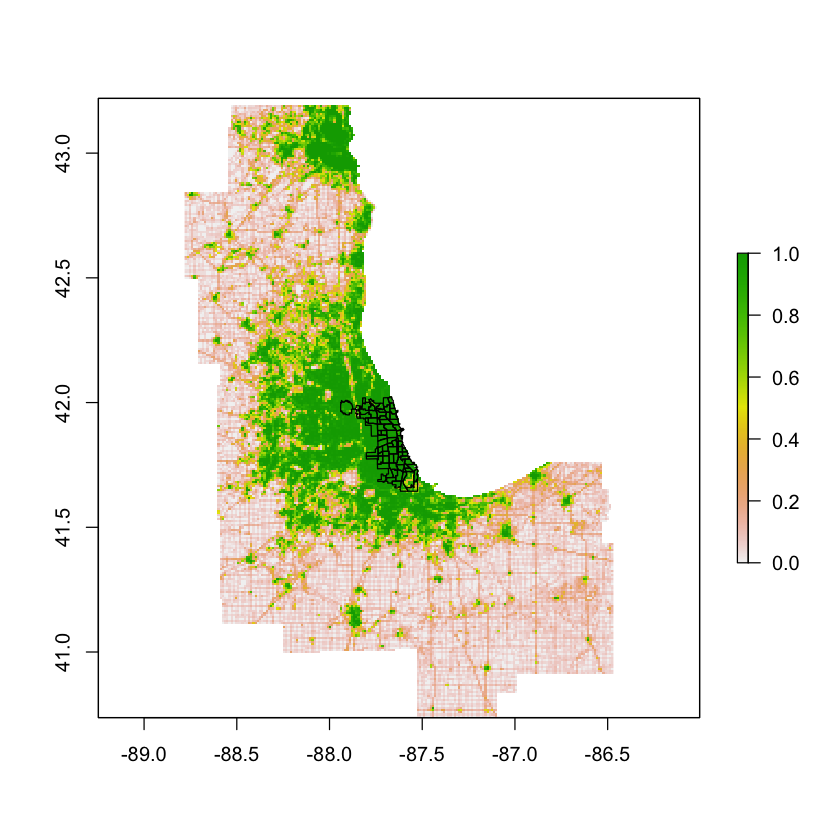

In [43]:
plot(master.raster$gry_ndx)
plot(chi.map$geom, add = T)

In [39]:
large.area <- st_read("Data/LargeAreaCounties")

Reading layer `LargeAreaCounties' from data source `/Users/isaackamber/Desktop/AoT/NewDash/Data/LargeAreaCounties' using driver `ESRI Shapefile'
Simple feature collection with 21 features and 8 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -88.77879 ymin: 40.73641 xmax: -86.46629 ymax: 43.21831
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


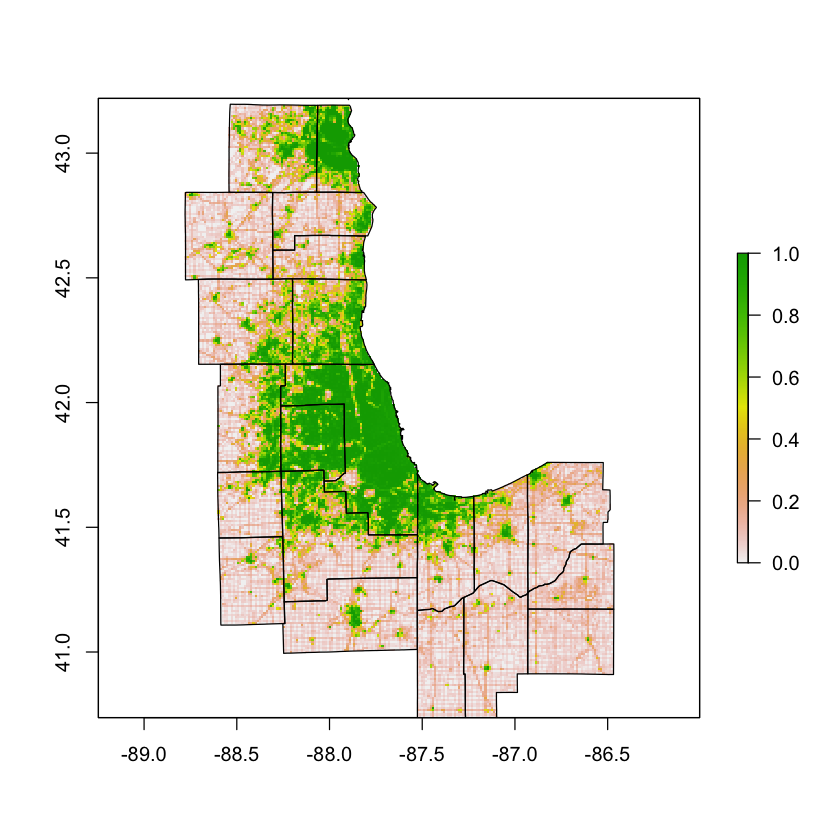

In [44]:
plot(master.raster$gry_ndx)
plot(large.area$geom, add = T)

### EPA Sensors
The EPA Sensors shapefile is available to be overlaid on the maps for variables measured from EPA sensor locations. The sensors are given as points on a shapefile and are tagged with the variable that is sensed at a given location. The shapefile can be modified if new variables are incorporated using other sensors. 

In [48]:
epa.sensors <- st_read("Data/EPA_Points")

Reading layer `EPA_Points' from data source `/Users/isaackamber/Desktop/AoT/NewDash/Data/EPA_Points' using driver `ESRI Shapefile'
Simple feature collection with 107 features and 3 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: -88.49905 ymin: 41.18785 xmax: -86.68444 ymax: 43.1818
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


In [51]:
summary(epa.sensors)

   Longitude         Latitude          Var              geometry  
 Min.   :-88.50   Min.   :41.19   Ozone  :30   POINT        :107  
 1st Qu.:-87.92   1st Qu.:41.64   PM25   :14   epsg:4326    :  0  
 Median :-87.80   Median :41.86   Temp   :14   +proj=long...:  0  
 Mean   :-87.70   Mean   :42.11   PM10   :13                      
 3rd Qu.:-87.49   3rd Qu.:42.58   SO2    :11                      
 Max.   :-86.68   Max.   :43.18   Lead   :10                      
                                  (Other):15                      

As we can see, the points contain lat/lon information and the variable measured by a given sensor. Let's visualize all ozone sensor locations in relation to the 21 counties. 

In [52]:
ozone.points <- epa.points[which(epa.points$Var == "Ozone"),]

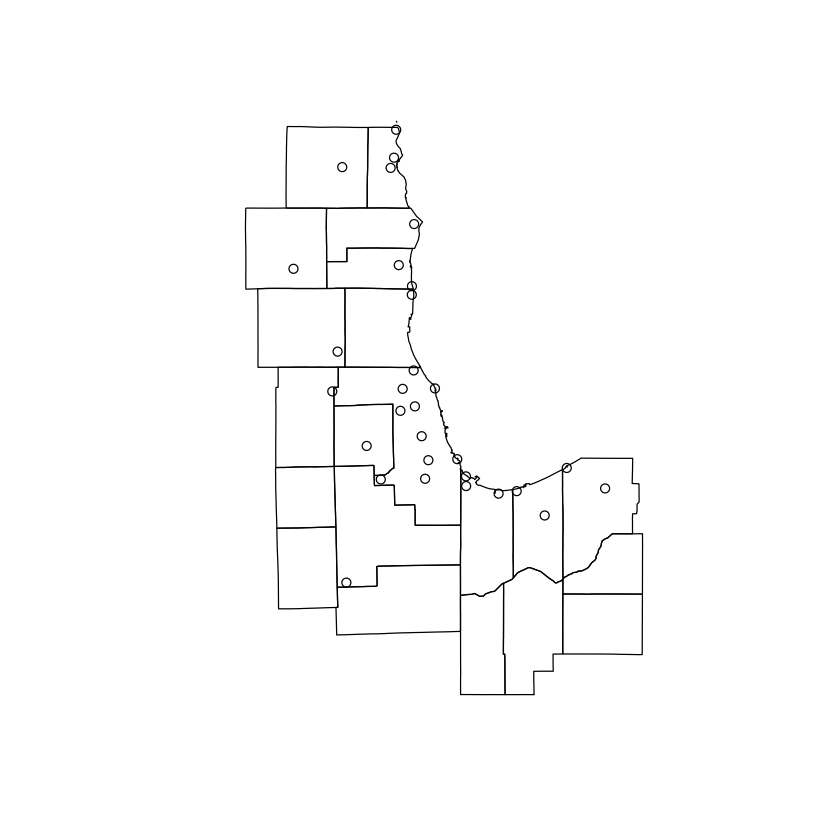

In [56]:
plot(large.area$geom)
plot(ozone.points$geom, add = T)

### CDPH Permits
Our final shapefile we will look at contains point information for all emissions sources permitted by the Chicago Department of Public Health

In [57]:
cdph <- st_read("Data/CDPH_Permits")

Reading layer `CDPH_Permits' from data source `/Users/isaackamber/Desktop/AoT/NewDash/Data/CDPH_Permits' using driver `ESRI Shapefile'
Simple feature collection with 3693 features and 20 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: -87.92 ymin: 41.64678 xmax: -87.52605 ymax: 42.02284
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


In [67]:
names(cdph)

[1] "APPLICATIO" "APPLICAT_1" "ADDRE"      "STREET_NUM" "STREET_N_1"
 [6] "DIREC"      "STREET_NA"  "STREET_T"   "APPLICAT_2" "APPLICAT_3"
[11] "STATU"      "APPLICAN"   "ISSUE"      "EXPIR"      "COMME"     
[16] "DATA_"      "Grfrn"      "nwAdd"      "lon"        "lat"       
[21] "geometry"

As we can see, there are 3693 unique points with data on their street address, application information, and source information. These points were geolocated from their addresses provided by the City of Chicago.

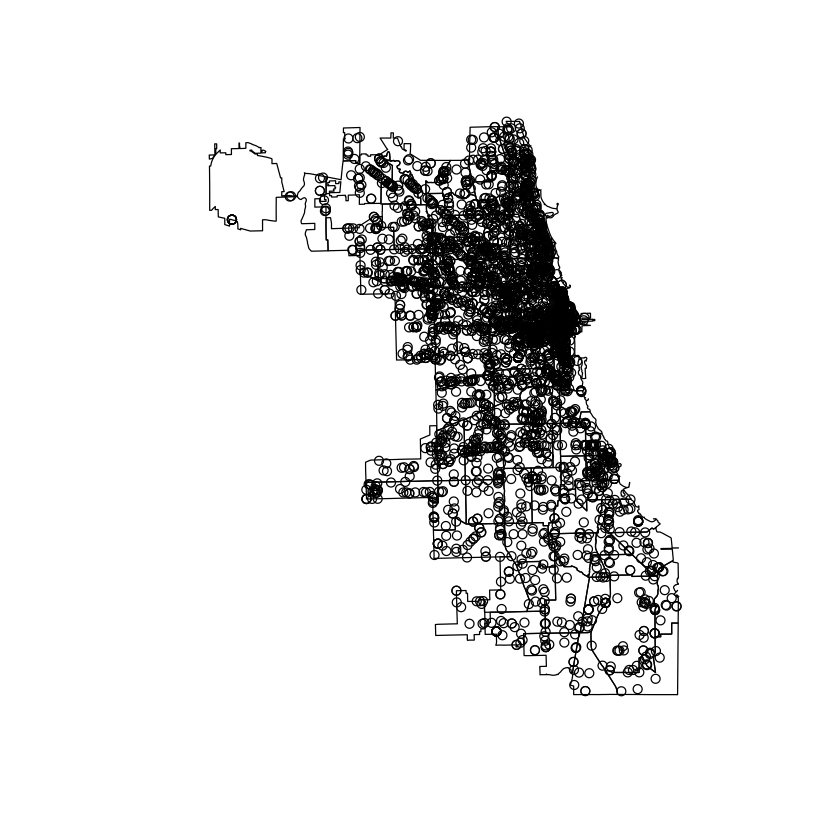

In [68]:
plot(chi.map$geom)
plot(cdph$geom, add = T)

## CSV Files
The dashboard also requires data from several CSV files in order to operate. These include text descriptions of the variables and averages by counties at different temporal scales. 

#### Descriptions.csv
As the name would suggest, this file contains the text descriptions for each variable as well as the source information found on each variable page.

#### county_averages_monthly.csv & county_averages_quarterly.csv
These files contain monthly and quarterly averages respectively at the county level for each of the variables with a temporal component. The monthly file is used to generate the plot.ly graph of the variable change over time and county comparisons while the quarterly averages file is simply provided for the user to download as desired.